**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Skander SERSI

Analyse de données - Score d'attaque

## Partie 1 - Description du problème

Dans un matche de football, on s'imagine toujours que le gagnant est celui qui a les joueurs les plus offensifs, cela est-il vrai pour les matches du championnat anglais ? 

Nous allons définir la notion de score d'attaque, qui est la capacité à finir une action dans notre cas c'est le fait de marquer devant les cages, en l'occurence cela correspond à l'attribut finishing de la table playerattributes. On va analyser chaque matche, et de chaque équipe du matche, nous allons calculer son score d'attaque qui correspond à la somme des scores d'attaque de chaque joueur puis faire un graphique représentant le nombre de rencontres gagnées par les équipes gagnantes par le score d'attaque "nbg" et les autres rencontres "nbp" qui correspondent aux rencontres perdus ou avec un matche nul de la part des équipes gagnantes au score d'attaque.

## Partie 2 - Modèle

La base des matches des championnats européens, des joueurs et de leurs attributs constituent notre modèle.

## Partie 3 - Code

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data_Matche = pd.read_csv("projet/match.csv")
data_Player = pd.read_csv("projet/playerattributes.csv")
dm = data_Matche.dropna(subset =['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'])
dm.head(-1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.20,2.25
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,...,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.20,2.38
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,...,8.50,1.30,4.35,8.00,1.35,4.33,8.50,1.36,4.20,7.00
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,...,1.73,4.35,3.30,1.75,4.50,3.40,1.75,4.20,3.30,1.75
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,...,5.00,1.65,3.50,4.50,1.65,3.50,5.00,1.70,3.40,4.33
173,174,1,1,2008/2009,27,2009-03-22 00:00:00,493045,9991,10000,1,...,4.75,1.60,3.40,5.00,1.65,3.40,5.00,1.62,3.50,5.00
176,177,1,1,2008/2009,27,2009-03-21 00:00:00,493048,9999,8203,1,...,2.75,2.25,3.25,2.80,2.10,3.25,3.15,2.25,3.20,2.75
189,190,1,1,2008/2009,29,2009-04-12 00:00:00,493061,8635,8342,1,...,4.75,1.65,3.40,5.00,1.70,3.40,4.50,1.73,3.40,4.20
190,191,1,1,2008/2009,29,2009-04-10 00:00:00,493062,9999,9987,1,...,2.15,2.80,3.25,2.25,3.20,3.20,2.10,2.80,3.20,2.25
217,218,1,1,2008/2009,31,2009-04-26 00:00:00,493080,9984,9987,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#### Definition de la fonction winner
# return 0 si équipe à domicile is winner
# return 1 si équipe visiteur is winner
# return 2 si draw
def winner(dataframe):
    if dataframe["home_team_goal"].values[0] > dataframe["away_team_goal"].values[0]:
        return 0
    if dataframe["home_team_goal"].values[0] < dataframe["away_team_goal"].values[0]:
        return 1
    else:
        return 2
# retourne le score d'attaque d'un joueur donné
def get_score_attack(player):
    return data_Player.loc[data_Player['player_api_id'] == player,['finishing']].head(1)


#retourne le score d'attaque d'une équipe donnée
def get_score_attack_team(team):
    squad = pd.DataFrame(team).transpose()
    
    res = pd.DataFrame(columns = ['finishing'])
    for i in squad[team.index[0]]:
        score = get_score_attack(int(i))
        res = res.append(score)
    return res.sum().values[0]

In [6]:
# fonction qui nous  rend le nbg et nbp décris ci-dessous
def calcul_attack_score(dataframe):
    # nbg : nombre de rencontres gagnées par les équipes gagnantes avec les scores d'attaques
    nbg = 0
    # nbp : nombre de rencontres perdues ou avec un matche nul avec des équipes par des équipes gagnantes au score d'attaque
    nbp = 0
    for i in dataframe.index:
        score_attaque_equipe_home = get_score_attack_team(dm.loc[dm.index == i,['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11']])
        score_attaque_equipe_away = get_score_attack_team(dm.loc[dm.index == i,['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11']])
        
        if (score_attaque_equipe_home > score_attaque_equipe_away):
            if (winner(dm.loc[dm.index == i]) == 0):
                nbg += 1
            else:
                nbp += 1
        if (score_attaque_equipe_home < score_attaque_equipe_away):
            if (winner(dm.loc[dm.index == i]) == 0) or (winner(dm.loc[dm.index == i]) == 2):
                nbp += 1
            else:
                nbg += 1
    return [nbg,nbp]

## Partie 4 - Protocole expérimental

In [7]:
res = calcul_attack_score(dm)

## Partie 5 - Résultats

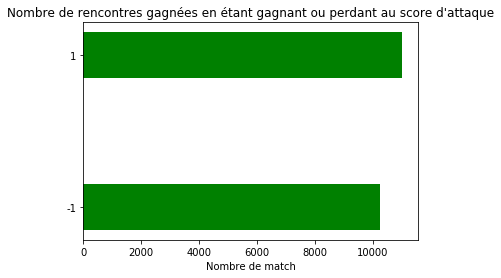

In [8]:
fig, ax = plt.subplots()
# -1 = Matches gagnés avec des equipes gagnantes en score d\'attaque
# 1 = Les autres matches
labels = np.unique(['-1','1'])
y_pos = np.arange(2)
ax.barh(y_pos, res, height = 0.3, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Nombre de match')
ax.set_title('Nombre de rencontres gagnées en étant gagnant ou perdant au score d\'attaque')

plt.show()

## Partie 6 - Analyse

On remarque bien que le fait d'être gagnant au score d'attaque ne fait pas d'une équipe gagnante suivant le résultat puisqu'il y a beaucoup plus de matches gagnés ou avec un score nul avec des équipes perdante en score d'attaque total que de matche gagnés par des équipes gagnantes par des scores d'attaque.